In [35]:
import os
import ccxt
import asyncio
import numpy as np
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [36]:
# Load environment variables

load_dotenv()

True

In [37]:
# Import environment variables

kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")


In [38]:
# Verify that environment variables were loaded

print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'NoneType'>
Kraken secren data type: <class 'NoneType'>


In [39]:
# Set the public and private keys for the API

exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

In [40]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()

# Import data as a Pandas DataFrame
crypto_df = pd.DataFrame(crypto_details)

# Display sample data
crypto_df

,AAVE/AUD,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/AUD,ADA/ETH,ADA/EUR,ADA/GBP,...,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,ZRX/EUR,ZRX/GBP,ZRX/USD,ZRX/BTC,USD/CAD,USD/JPY
active,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
altname,AAVEAUD,AAVEETH,AAVEEUR,AAVEGBP,AAVEUSD,AAVEXBT,ADAAUD,ADAETH,ADAEUR,ADAGBP,...,YFIUSD,YFIXBT,EURUSD,GBPUSD,ZRXEUR,ZRXGBP,ZRXUSD,ZRXXBT,USDCAD,USDJPY
base,AAVE,AAVE,AAVE,AAVE,AAVE,AAVE,ADA,ADA,ADA,ADA,...,YFI,YFI,EUR,GBP,ZRX,ZRX,ZRX,ZRX,USD,USD
baseId,AAVE,AAVE,AAVE,AAVE,AAVE,AAVE,ADA,ADA,ADA,ADA,...,YFI,YFI,ZEUR,ZGBP,ZRX,ZRX,ZRX,ZRX,ZUSD,ZUSD
darkpool,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
id,AAVEAUD,AAVEETH,AAVEEUR,AAVEGBP,AAVEUSD,AAVEXBT,ADAAUD,ADAETH,ADAEUR,ADAGBP,...,YFIUSD,YFIXBT,ZEURZUSD,ZGBPZUSD,ZRXEUR,ZRXGBP,ZRXUSD,ZRXXBT,ZUSDZCAD,ZUSDZJPY
info,"{'altname': 'AAVEAUD', 'wsname': 'AAVE/AUD', '...","{'altname': 'AAVEETH', 'wsname': 'AAVE/ETH', '...","{'altname': 'AAVEEUR', 'wsname': 'AAVE/EUR', '...","{'altname': 'AAVEGBP', 'wsname': 'AAVE/GBP', '...","{'altname': 'AAVEUSD', 'wsname': 'AAVE/USD', '...","{'altname': 'AAVEXBT', 'wsname': 'AAVE/XBT', '...","{'altname': 'ADAAUD', 'wsname': 'ADA/AUD', 'ac...","{'altname': 'ADAETH', 'wsname': 'ADA/ETH', 'ac...","{'altname': 'ADAEUR', 'wsname': 'ADA/EUR', 'ac...","{'altname': 'ADAGBP', 'wsname': 'ADA/GBP', 'ac...",...,"{'altname': 'YFIUSD', 'wsname': 'YFI/USD', 'ac...","{'altname': 'YFIXBT', 'wsname': 'YFI/XBT', 'ac...","{'altname': 'EURUSD', 'wsname': 'EUR/USD', 'ac...","{'altname': 'GBPUSD', 'wsname': 'GBP/USD', 'ac...","{'altname': 'ZRXEUR', 'wsname': 'ZRX/EUR', 'ac...","{'altname': 'ZRXGBP', 'wsname': 'ZRX/GBP', 'ac...","{'altname': 'ZRXUSD', 'wsname': 'ZRX/USD', 'ac...","{'altname': 'ZRXXBT', 'wsname': 'ZRX/XBT', 'ac...","{'altname': 'USDCAD', 'wsname': 'USD/CAD', 'ac...","{'altname': 'USDJPY', 'wsname': 'USD/JPY', 'ac..."
limits,"{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...",...,"{'amount': {'min': 0.00015, 'max': 100000000.0...","{'amount': {'min': 0.00015, 'max': 100000000.0...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ..."
maker,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,...,0.0016,0.0016,0.002,0.002,0.0016,0.0016,0.0016,0.0016,0.002,0
percentage,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [41]:
# Fetch daily candlestick bar data from `BTC/USD`
historical_prices = exchange.fetch_ohlcv("ETH/USD", "1d")

# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, columns=["timestamp", "open", "high", "low", "close", "volume"]
)
historical_prices_df.head()

,timestamp,open,high,low,close,volume
0,1560643200000,269.32,278.80,263.11,268.58,82865.243901
1,1560729600000,268.60,275.74,267.20,273.74,56187.611693
2,1560816000000,273.74,274.14,260.97,264.65,61247.868486
3,1560902400000,264.66,270.00,263.60,268.91,37463.932218
4,1560988800000,268.90,274.20,266.51,271.99,40588.112760


In [42]:
 # Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], unit="ms"
)
historical_prices_df.head()

,timestamp,open,high,low,close,volume,date
0,1560643200000,269.32,278.80,263.11,268.58,82865.243901,2019-06-16
1,1560729600000,268.60,275.74,267.20,273.74,56187.611693,2019-06-17
2,1560816000000,273.74,274.14,260.97,264.65,61247.868486,2019-06-18
3,1560902400000,264.66,270.00,263.60,268.91,37463.932218,2019-06-19
4,1560988800000,268.90,274.20,266.51,271.99,40588.112760,2019-06-20


In [74]:
# Set index as datetime object and drop extraneous columns
historical_prices_df.set_index(pd.to_datetime(historical_prices_df['date'], infer_datetime_format=True), inplace=True)
historical_prices_df.drop(columns=['date'], inplace=True)
historical_prices_df.head()

,open,high,low,close,volume,return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
date,,,,,,,,,,,
2019-06-16,269.32,278.80,263.11,268.58,82865.243901,NaN,268.580000,268.580000,0.0,0.0,0.0
2019-06-17,268.60,275.74,267.20,273.74,56187.611693,0.019212,272.020000,271.249380,1.0,0.0,1.0
2019-06-18,273.74,274.14,260.97,264.65,61247.868486,-0.033207,267.808571,268.895471,0.0,-1.0,-1.0
2019-06-19,264.66,270.00,263.60,268.91,37463.932218,0.016097,268.396000,268.899489,0.0,-1.0,-1.0
2019-06-20,268.90,274.20,266.51,271.99,40588.112760,0.011454,270.250968,269.606103,1.0,0.0,1.0


In [75]:
# Drop NAs and calculate daily percent return
historical_prices_df['return'] = historical_prices_df['close'].dropna().pct_change()
historical_prices_df.head()

,open,high,low,close,volume,return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
date,,,,,,,,,,,
2019-06-16,269.32,278.80,263.11,268.58,82865.243901,NaN,268.580000,268.580000,0.0,0.0,0.0
2019-06-17,268.60,275.74,267.20,273.74,56187.611693,0.019212,272.020000,271.249380,1.0,0.0,1.0
2019-06-18,273.74,274.14,260.97,264.65,61247.868486,-0.033207,267.808571,268.895471,0.0,-1.0,-1.0
2019-06-19,264.66,270.00,263.60,268.91,37463.932218,0.016097,268.396000,268.899489,0.0,-1.0,-1.0
2019-06-20,268.90,274.20,266.51,271.99,40588.112760,0.011454,270.250968,269.606103,1.0,0.0,1.0


In [76]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['fast_close'] = historical_prices_df['close'].ewm(halflife=short_window).mean()
historical_prices_df['slow_close'] = historical_prices_df['close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
historical_prices_df['crossover_long'] = np.where(historical_prices_df['fast_close'] > historical_prices_df['slow_close'], 1.0, 0.0)
historical_prices_df['crossover_short'] = np.where(historical_prices_df['fast_close'] < historical_prices_df['slow_close'], -1.0, 0.0)
historical_prices_df['crossover_signal'] = historical_prices_df['crossover_long'] + historical_prices_df['crossover_short']

historical_prices_df.head()

,open,high,low,close,volume,return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
date,,,,,,,,,,,
2019-06-16,269.32,278.80,263.11,268.58,82865.243901,NaN,268.580000,268.580000,0.0,0.0,0.0
2019-06-17,268.60,275.74,267.20,273.74,56187.611693,0.019212,272.020000,271.249380,1.0,0.0,1.0
2019-06-18,273.74,274.14,260.97,264.65,61247.868486,-0.033207,267.808571,268.895471,0.0,-1.0,-1.0
2019-06-19,264.66,270.00,263.60,268.91,37463.932218,0.016097,268.396000,268.899489,0.0,-1.0,-1.0
2019-06-20,268.90,274.20,266.51,271.99,40588.112760,0.011454,270.250968,269.606103,1.0,0.0,1.0


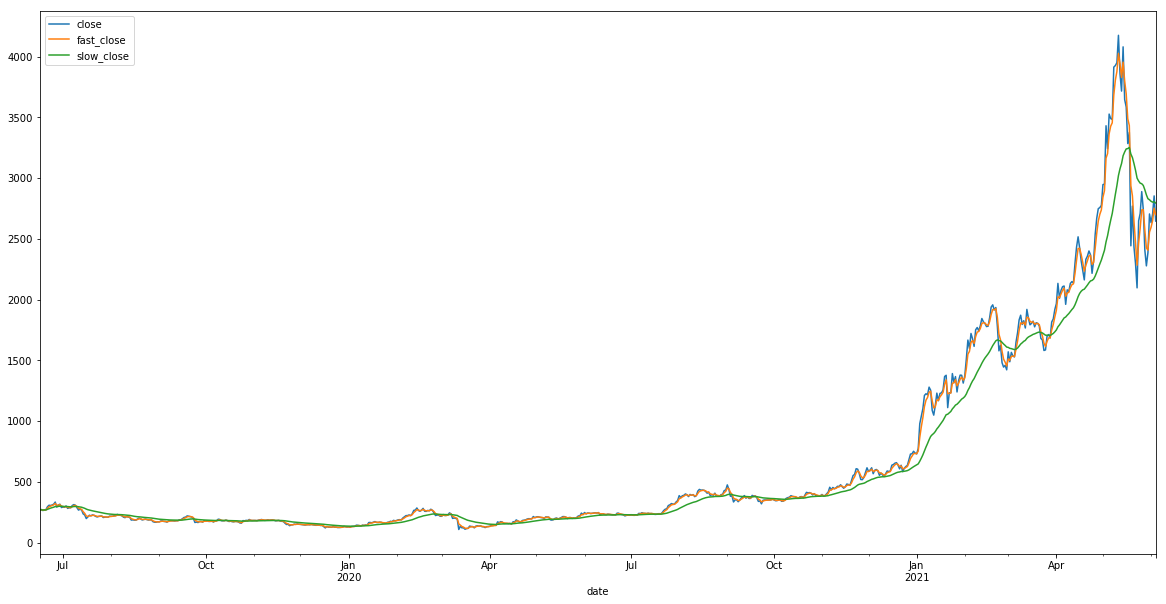

In [77]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

In [78]:
# Save new dataframe
historical_prices_df.to_csv("new_df.csv")

In [79]:
 # Set path to CSV and read in CSV
csv_path = Path('../Project-2/new_df.csv')
trading_signals_df=pd.read_csv(csv_path)
trading_signals_df.head()

,date,open,high,low,close,volume,return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
0,2019-06-16,269.32,278.80,263.11,268.58,82865.243901,NaN,268.580000,268.580000,0.0,0.0,0.0
1,2019-06-17,268.60,275.74,267.20,273.74,56187.611693,0.019212,272.020000,271.249380,1.0,0.0,1.0
2,2019-06-18,273.74,274.14,260.97,264.65,61247.868486,-0.033207,267.808571,268.895471,0.0,-1.0,-1.0
3,2019-06-19,264.66,270.00,263.60,268.91,37463.932218,0.016097,268.396000,268.899489,0.0,-1.0,-1.0
4,2019-06-20,268.90,274.20,266.51,271.99,40588.112760,0.011454,270.250968,269.606103,1.0,0.0,1.0


In [81]:
trading_signals_df.set_index(pd.to_datetime(trading_signals_df['date'], infer_datetime_format=True), inplace=True)
trading_signals_df.drop(columns=['date'], inplace=True)
trading_signals_df.head()

,open,high,low,close,volume,return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
date,,,,,,,,,,,
2019-06-16,269.32,278.80,263.11,268.58,82865.243901,NaN,268.580000,268.580000,0.0,0.0,0.0
2019-06-17,268.60,275.74,267.20,273.74,56187.611693,0.019212,272.020000,271.249380,1.0,0.0,1.0
2019-06-18,273.74,274.14,260.97,264.65,61247.868486,-0.033207,267.808571,268.895471,0.0,-1.0,-1.0
2019-06-19,264.66,270.00,263.60,268.91,37463.932218,0.016097,268.396000,268.899489,0.0,-1.0,-1.0
2019-06-20,268.90,274.20,266.51,271.99,40588.112760,0.011454,270.250968,269.606103,1.0,0.0,1.0


In [82]:
# Set x variable list of features

x_var_list= ['crossover_signal']

# Filter by x-variable list

trading_signals_df[x_var_list].head()

,crossover_signal
date,
2019-06-16,0.0
2019-06-17,1.0
2019-06-18,-1.0
2019-06-19,-1.0
2019-06-20,1.0


In [83]:
 # Drop NAs and replace positive/negative infinity values
trading_signals_df.dropna(subset=x_var_list, inplace=True)
trading_signals_df.head()

,open,high,low,close,volume,return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
date,,,,,,,,,,,
2019-06-16,269.32,278.80,263.11,268.58,82865.243901,NaN,268.580000,268.580000,0.0,0.0,0.0
2019-06-17,268.60,275.74,267.20,273.74,56187.611693,0.019212,272.020000,271.249380,1.0,0.0,1.0
2019-06-18,273.74,274.14,260.97,264.65,61247.868486,-0.033207,267.808571,268.895471,0.0,-1.0,-1.0
2019-06-19,264.66,270.00,263.60,268.91,37463.932218,0.016097,268.396000,268.899489,0.0,-1.0,-1.0
2019-06-20,268.90,274.20,266.51,271.99,40588.112760,0.011454,270.250968,269.606103,1.0,0.0,1.0


In [84]:
trading_signals_df.dropna(subset=['return'], inplace=True)
trading_signals_df = trading_signals_df.replace([np.inf, -np.inf], np.nan)
trading_signals_df.head()

,open,high,low,close,volume,return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
date,,,,,,,,,,,
2019-06-17,268.60,275.74,267.20,273.74,56187.611693,0.019212,272.020000,271.249380,1.0,0.0,1.0
2019-06-18,273.74,274.14,260.97,264.65,61247.868486,-0.033207,267.808571,268.895471,0.0,-1.0,-1.0
2019-06-19,264.66,270.00,263.60,268.91,37463.932218,0.016097,268.396000,268.899489,0.0,-1.0,-1.0
2019-06-20,268.90,274.20,266.51,271.99,40588.112760,0.011454,270.250968,269.606103,1.0,0.0,1.0
2019-06-21,271.97,296.59,271.97,296.08,117214.372819,0.088569,283.370476,274.816678,1.0,0.0,1.0


In [85]:
 # Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
trading_signals_df['Positive Return'] = np.where(trading_signals_df['return']>0, 1.0, 0.0)
trading_signals_df.head()

,open,high,low,close,volume,return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,Positive Return
date,,,,,,,,,,,,
2019-06-17,268.60,275.74,267.20,273.74,56187.611693,0.019212,272.020000,271.249380,1.0,0.0,1.0,1.0
2019-06-18,273.74,274.14,260.97,264.65,61247.868486,-0.033207,267.808571,268.895471,0.0,-1.0,-1.0,0.0
2019-06-19,264.66,270.00,263.60,268.91,37463.932218,0.016097,268.396000,268.899489,0.0,-1.0,-1.0,1.0
2019-06-20,268.90,274.20,266.51,271.99,40588.112760,0.011454,270.250968,269.606103,1.0,0.0,1.0,1.0
2019-06-21,271.97,296.59,271.97,296.08,117214.372819,0.088569,283.370476,274.816678,1.0,0.0,1.0,1.0


In [86]:
trading_signals_df.index.min(), trading_signals_df.index.max() 

(Timestamp('2019-06-17 00:00:00'), Timestamp('2021-06-04 00:00:00'))

In [88]:
# Construct training start and end dates
training_start = trading_signals_df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2021-05-24'

# Construct testing start and end dates
testing_start =  '2019-05-25'
testing_end = trading_signals_df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2019-06-17
Training End: 2021-05-24
Testing Start: 2019-05-25
Testing End: 2021-06-04


In [89]:
# Construct the X_train and y_train datasets
X_train = trading_signals_df[x_var_list][training_start:training_end]

X_train.tail()

,crossover_signal
date,
2021-05-20,-1.0
2021-05-21,-1.0
2021-05-22,-1.0
2021-05-23,-1.0
2021-05-24,-1.0


In [90]:
y_train  = trading_signals_df['Positive Return'][training_start:training_end]
y_train.tail()

date
2021-05-20    1.0
2021-05-21    0.0
2021-05-22    0.0
2021-05-23    0.0
2021-05-24    1.0
Name: Positive Return, dtype: float64

In [91]:
# Construct the X_test and y_test datasets
X_test = trading_signals_df[x_var_list][testing_start:testing_end]
X_test.tail()

,crossover_signal
date,
2021-05-31,-1.0
2021-06-01,-1.0
2021-06-02,-1.0
2021-06-03,-1.0
2021-06-04,-1.0


In [92]:
y_test = trading_signals_df['Positive Return'][testing_start:testing_end]
y_test.tail()

date
2021-05-31    1.0
2021-06-01    0.0
2021-06-02    1.0
2021-06-03    1.0
2021-06-04    0.0
Name: Positive Return, dtype: float64

In [93]:
# Import RandomForest Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [94]:
 # Fit a SKLearn linear regression using just the training set (X_train, y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, random_state=0)

In [95]:
# Make predictions on 'y' based on x test 
predictions = model.predict(X_test)
predictions

array([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [97]:
# Assemble actual y data (y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results['Predicted Value'] =  predictions 
Results.head()

,Positive Return,Predicted Value
date,,
2019-06-17,1.0,1.0
2019-06-18,0.0,0.0
2019-06-19,1.0,0.0
2019-06-20,1.0,1.0
2019-06-21,1.0,1.0


In [98]:
 # Save the pre-trained model
from joblib import dump, load
dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']